In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [5]:
pd.set_option("display.float_format","{:,.2f}".format)

In [6]:
sns.set(style="whitegrid",palette="Set2",font_scale=1.1)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(1332, 10)

In [11]:
df.isna().sum().sum()

np.int64(0)

In [12]:
df.describe(include="all")

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,"1,332.00","1,332.00",1332,"1,332.00","1,332.00",1332,"1,332.00",1332,1332,"1,332.00"
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,"13,325.25"
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,"12,109.62"
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,"1,121.87"
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,"4,760.16"
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,"9,412.97"
75%,"1,007.25",47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,"16,781.33"


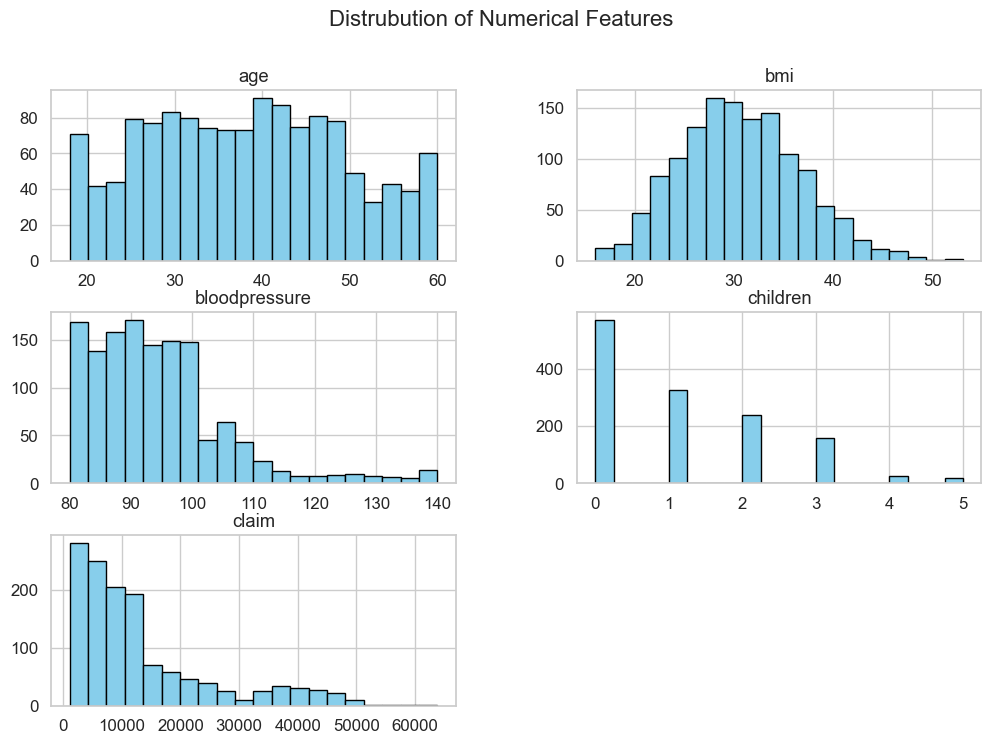

In [13]:
numeric_cols = ["age","bmi","bloodpressure","children","claim"]
df[numeric_cols].hist(bins=20,figsize=(12,8), color = "skyblue", edgecolor = "black")
plt.suptitle("Distrubution of Numerical Features",fontsize = 16)
plt.show()

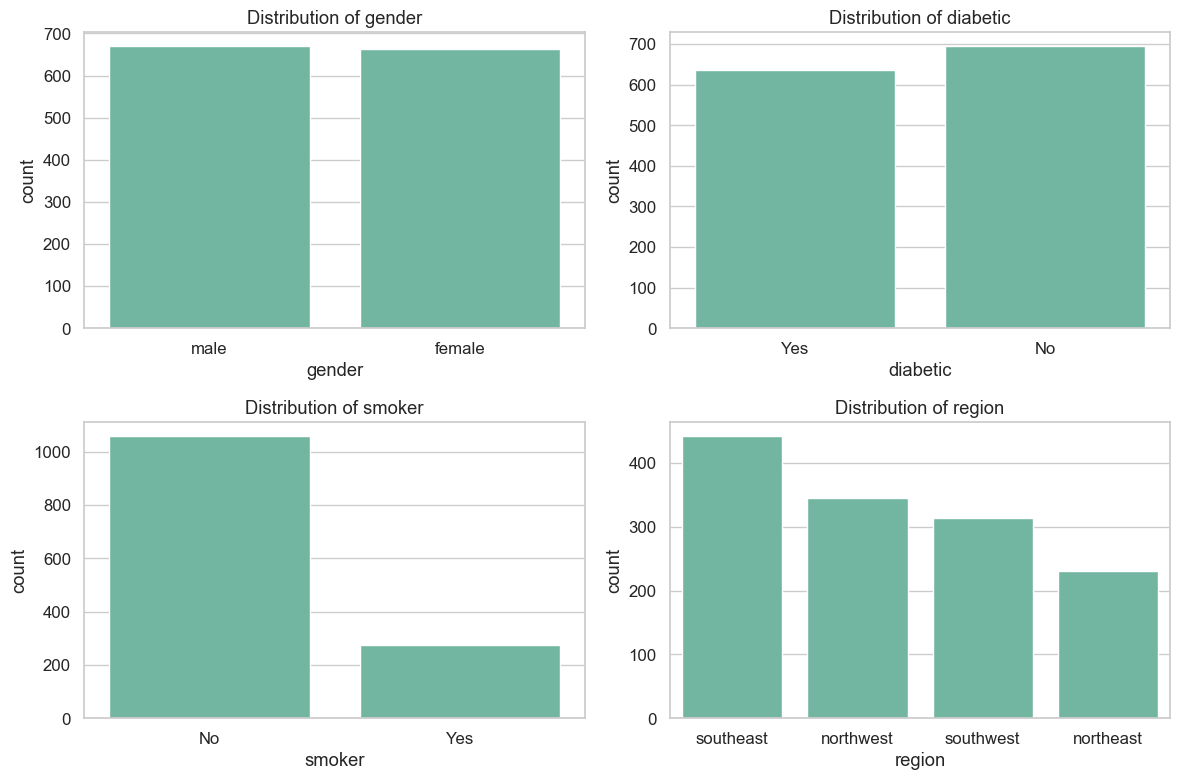

In [14]:
cat_cols = ["gender","diabetic","smoker","region"]

plt.figure(figsize=(12,8))

for i, col in enumerate(cat_cols , 1):
    plt.subplot(2,2,i)
    sns.countplot(data=df , x = col)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [15]:
df.groupby(["gender","smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8,762.30
        Yes      30,679.00
male    No        8,169.25
        Yes      33,042.01
Name: claim, dtype: float64

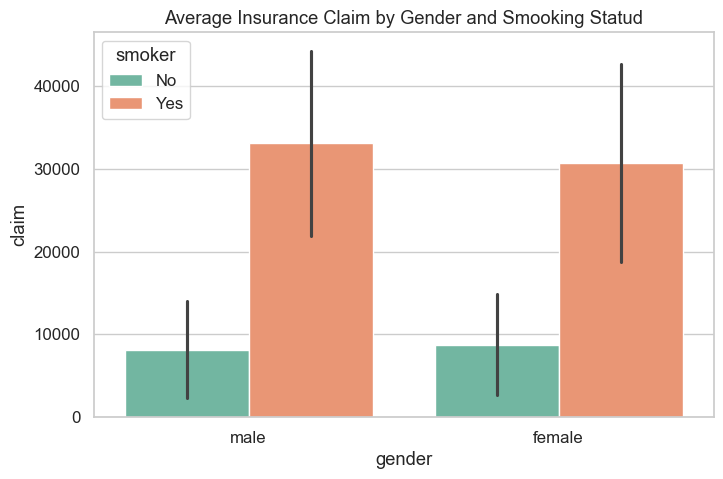

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(data= df , x ="gender", y= "claim", hue= "smoker", estimator= "mean", errorbar= "sd")
plt.title("Average Insurance Claim by Gender and Smooking Statud")
plt.show()


In [17]:
pivot_region_diabetic =df.groupby(["region", "diabetic"])["claim"].mean().unstack()

In [18]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,"16,966.86","16,818.30"
northwest,"11,442.83","12,224.96"
southeast,"13,578.72","12,574.09"
southwest,"13,069.91","12,313.74"


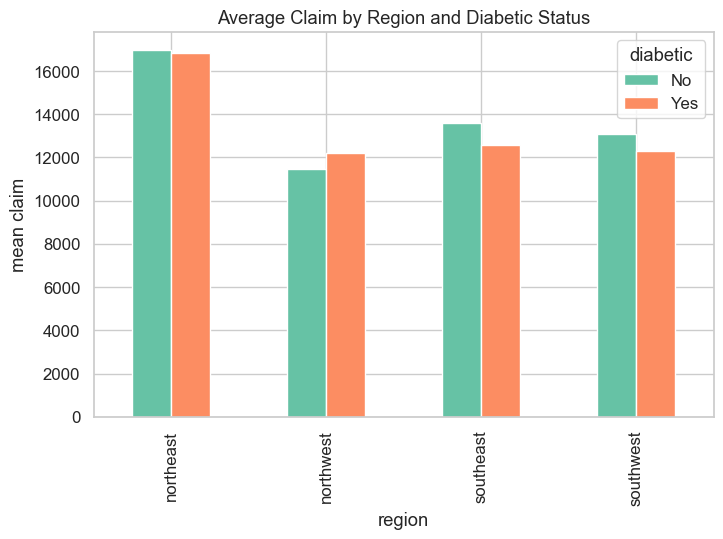

In [19]:
pivot_region_diabetic.plot(kind= "bar" , figsize= (8,5))
plt.title("Average Claim by Region and Diabetic Status")
plt.ylabel("mean claim")
plt.show()


In [20]:
pivot_table = pd.pivot_table(df, values= "claim", index= "region" , columns= "smoker" , aggfunc= "mean")
pivot_table

smoker,No,Yes
region,,
northeast,"11,666.11","29,673.54"
northwest,"8,076.20","30,192.00"
southeast,"7,444.14","34,845.00"
southwest,"8,294.75","32,269.06"


In [21]:
pivot_table = pd.pivot_table(df , values= "claim", index= "children" , columns= "diabetic" , aggfunc= "mean")
pivot_table

diabetic,No,Yes
children,,
0,"12,967.40","11,985.29"
1,"12,730.46","12,732.06"
2,"15,567.77","14,579.36"
3,"13,807.61","17,091.26"
4,"14,106.63","13,573.35"
5,"8,519.04","9,205.59"


In [22]:
numeric_cols

['age', 'bmi', 'bloodpressure', 'children', 'claim']

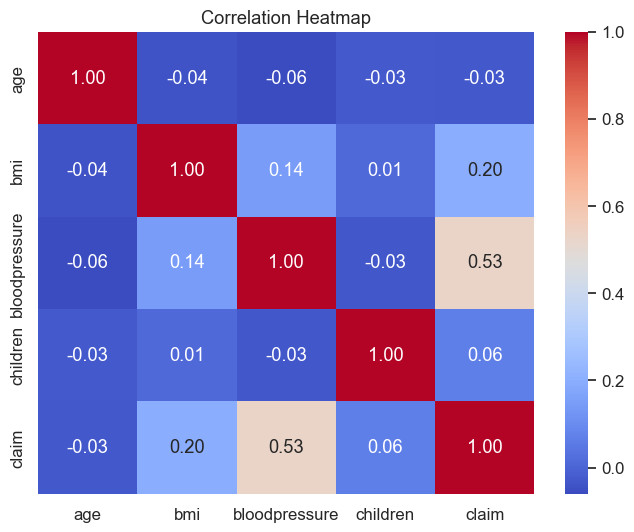

In [23]:
plt.figure(figsize= (8,6))
sns.heatmap(df[numeric_cols].corr(), annot= True , cmap= "coolwarm" , fmt= ".2f")
plt.title("Correlation Heatmap")
plt.show()

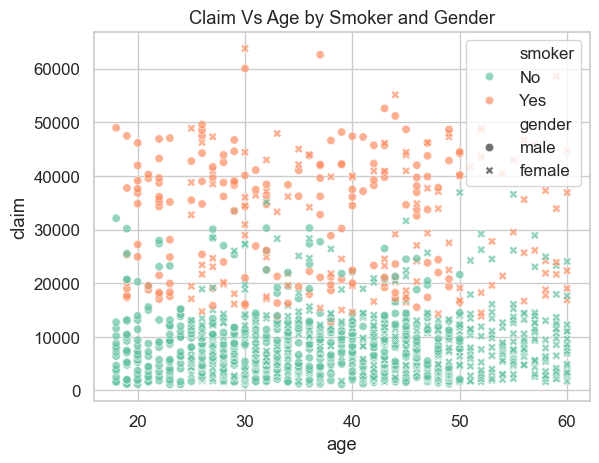

In [24]:
sns.scatterplot(data= df , x= "age" , y= "claim", hue= "smoker", style= "gender" , alpha = 0.7)
plt.title("Claim Vs Age by Smoker and Gender")
plt.show()

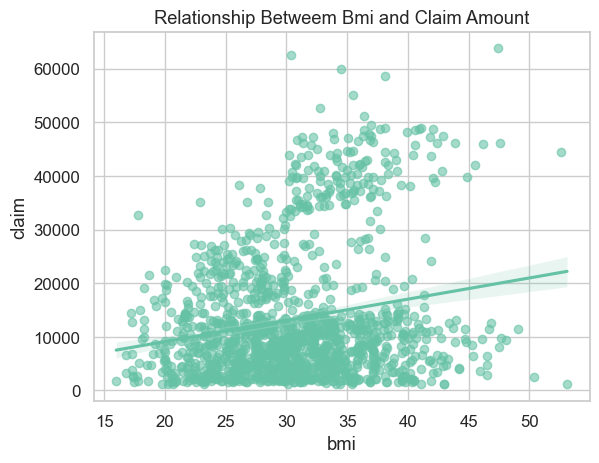

In [25]:
sns.regplot(data= df , x = "bmi",y= "claim", scatter_kws= {"alpha" : 0.6})
plt.title("Relationship Betweem Bmi and Claim Amount")
plt.show()

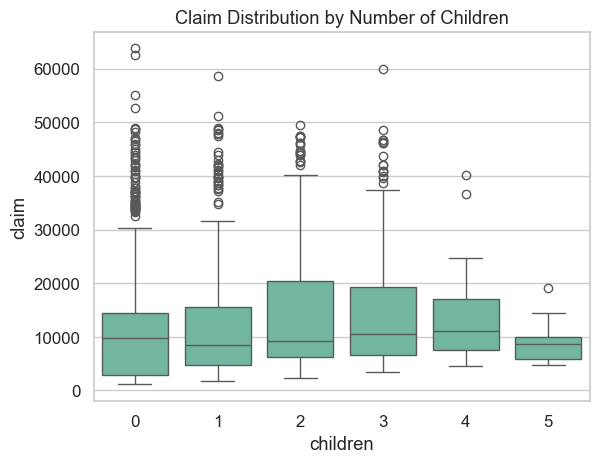

In [26]:
sns.boxplot(data= df , x= "children", y= "claim")
plt.title("Claim Distribution by Number of Children")
plt.show()

In [27]:
df["age_group"] = pd.cut(df["age"],bins= [0,18,30,45,60,100], labels= ["<18", "18-30","31-45","46-60","60+"])


In [28]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,"1,121.87",31-45
1,2,24.00,male,30.10,87,No,0,No,southeast,"1,131.51",18-30
7,8,19.00,male,41.10,100,No,0,No,northwest,"1,146.80",18-30
8,9,20.00,male,43.00,86,No,0,No,northwest,"1,149.40",18-30
9,10,30.00,male,53.10,97,No,0,No,northwest,"1,163.46",18-30
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,"55,135.40",31-45
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,"58,571.07",46-60
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,"60,021.40",18-30
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,"62,592.87",31-45


In [29]:
df["age_group"].value_counts()

age_group
31-45    553
46-60    383
18-30    380
<18       16
60+        0
Name: count, dtype: int64

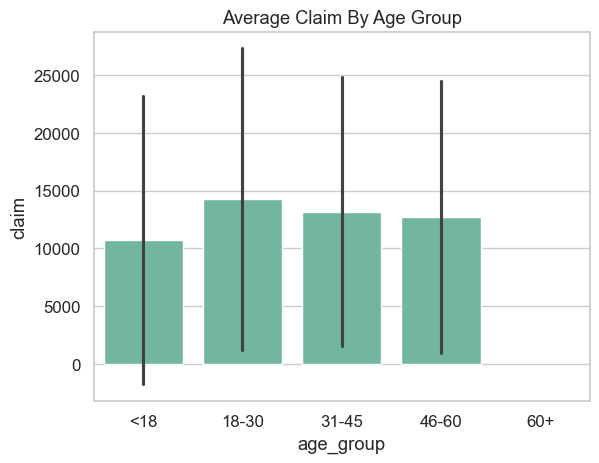

In [30]:
sns.barplot(data= df , x = "age_group", y= "claim" , estimator= "mean", errorbar="sd")
plt.title("Average Claim By Age Group")
plt.show()

In [31]:
df["bmi_category"] = pd.cut(df["bmi"], bins = [0,18.5,24.9,29.9,100],labels= ["Underweight", "Normal" ,"Overweight","Obese"])

In [32]:
df["bmi_category"].value_counts()

bmi_category
Obese          702
Overweight     387
Normal         222
Underweight     21
Name: count, dtype: int64

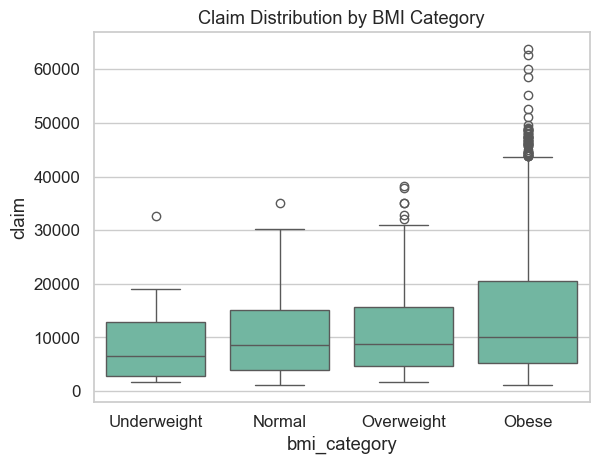

In [33]:
sns.boxplot(data= df , x= "bmi_category", y="claim")
plt.title("Claim Distribution by BMI Category")
plt.show()

In [34]:
region_stats = df.groupby("region").agg(
    smoker_rate = ("smoker", lambda x : (x == "yes").mean()*100),
    mean_claim = ("claim","mean")
).reset_index()

In [35]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,0.00,"16,889.04"
1,northwest,0.00,"11,794.22"
2,southeast,0.00,"13,085.50"
3,southwest,0.00,"12,723.13"


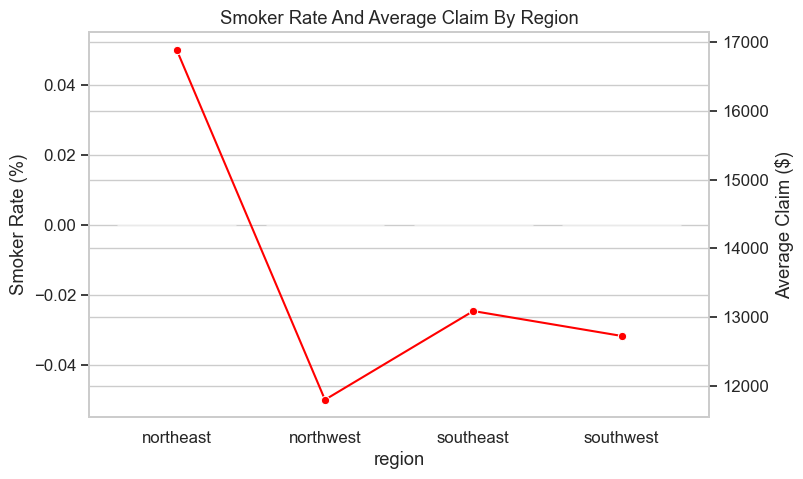

In [36]:
fig , ax1 = plt.subplots(figsize = (8,5))
sns.barplot(data= region_stats , x= "region",y= "smoker_rate", ax = ax1 , alpha = 0.6)
ax2 = ax1.twinx()
sns.lineplot(data= region_stats , x= "region",y="mean_claim", ax = ax2, color = "red", marker= "o")

ax1.set_ylabel("Smoker Rate (%)")
ax2.set_ylabel("Average Claim ($)")
plt.title("Smoker Rate And Average Claim By Region")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn .preprocessing import LabelEncoder , StandardScaler
import joblib


In [38]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group,bmi_category
0,1,39.00,male,23.20,91,Yes,0,No,southeast,"1,121.87",31-45,Normal
1,2,24.00,male,30.10,87,No,0,No,southeast,"1,131.51",18-30,Obese
7,8,19.00,male,41.10,100,No,0,No,northwest,"1,146.80",18-30,Obese
8,9,20.00,male,43.00,86,No,0,No,northwest,"1,149.40",18-30,Obese
9,10,30.00,male,53.10,97,No,0,No,northwest,"1,163.46",18-30,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,"55,135.40",31-45,Obese
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,"58,571.07",46-60,Obese
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,"60,021.40",18-30,Obese
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,"62,592.87",31-45,Obese


In [39]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [40]:
x = df[["age", "gender", "bmi","bloodpressure", "diabetic","children","smoker"]]
y = df["claim"]

In [41]:
x

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,male,23.20,91,Yes,0,No
1,24.00,male,30.10,87,No,0,No
7,19.00,male,41.10,100,No,0,No
8,20.00,male,43.00,86,No,0,No
9,30.00,male,53.10,97,No,0,No
...,...,...,...,...,...,...,...
1335,44.00,female,35.50,88,Yes,0,Yes
1336,59.00,female,38.10,120,No,1,Yes
1337,30.00,male,34.50,91,Yes,3,Yes
1338,37.00,male,30.40,106,No,0,Yes


In [42]:
cat_cols = ["gender","diabetic","smoker"]
label_encoders = {}

In [43]:
for col in cat_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    label_encoders[col] = le

    joblib.dump(le,f"label_encoder_{col}.pkl")

C:\Users\Jamshaid Mustafa\AppData\Local\Temp\ipykernel_43072\2562269998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.fit_transform(x[col])
C:\Users\Jamshaid Mustafa\AppData\Local\Temp\ipykernel_43072\2562269998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.fit_transform(x[col])
C:\Users\Jamshaid Mustafa\AppData\Local\Temp\ipykernel_43072\2562269998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [44]:
x

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,1,23.20,91,1,0,0
1,24.00,1,30.10,87,0,0,0
7,19.00,1,41.10,100,0,0,0
8,20.00,1,43.00,86,0,0,0
9,30.00,1,53.10,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.00,0,35.50,88,1,0,1
1336,59.00,0,38.10,120,0,1,1
1337,30.00,1,34.50,91,1,3,1
1338,37.00,1,30.40,106,0,0,1


In [45]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [46]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [47]:
num_cols = ["age","bmi","bloodpressure", "children"]
scaler = StandardScaler()

In [48]:
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [82]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [83]:
print(x_train.shape,y_train.shape)

(1065, 7) (1065,)


In [84]:
print(x_test.shape,y_test.shape)

(267, 7) (267,)


In [85]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV , cross_val_score
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


In [86]:
def evaluate_model(model,x_train,x_test,y_train,y_test):
    y_pred  =model.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    return {"R2": r2, "MAE" : mae ,"RMSE": rmse}

In [87]:
results = {}

In [88]:
lr = LinearRegression()
lr.fit(x_train,y_train)
results["Linear Regression"] = evaluate_model(lr,x_train , x_test , y_train , y_test )
print("Linear Regression Model Trained")

best_poly_model = None
best_poly_score = -np.inf

for degree in [2,3]:
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)

    poly_lr = LinearRegression()
    poly_lr.fit(x_train_poly,y_train)

    score = poly_lr.score(x_test_poly,y_test)

    if score > best_poly_score:
        best_poly_score = score
        best_poly_model = (degree , poly , poly_lr)

degree , poly , poly_lr = best_poly_model

results[f"Polynomial Regression (deg) = {degree}"] = evaluate_model(poly_lr, poly.fit_transform(x_train), poly.transform(x_test),y_train,y_test)

print("Polynomial Regression Models are Trained")

rf = RandomForestRegressor()

rf_params = {
    "n_estimators": [100,200],
    "max_depth": [None, 10 , 20],
    "min_samples_split" : [2,5],
    "min_samples_leaf" : [1,2]

}
rf_grid = GridSearchCV(rf ,rf_params, cv = 3 , scoring = "r2", n_jobs = -1 , verbose = 0)
rf_grid.fit(x_train,y_train)
best_rf = rf_grid.best_estimator_

results["Random Forest"] = evaluate_model(best_rf ,x_train ,x_test ,y_train ,y_test)

print("Random Forest Training is Completed, best Parameters:", rf_grid.best_params_)

svr = SVR()
svr_params = {
    "kernel": ["rbf","poly","linear"],
    "C" : [1,10,50],
    "epsilon" : [0.1,0.2,0.5],
    "degree" : [2,3]

}

svr_grid = GridSearchCV(svr,svr_params, cv = 3 , scoring= "r2", n_jobs= -1,verbose= 0)
svr_grid.fit(x_train,y_train)

best_svr = svr_grid.best_estimator_


results["SVR"] = evaluate_model(best_svr ,x_train , x_test,y_train , y_test)

print("SVR Training is Completed , best Parameters :",svr_grid.best_params_)


xgb = XGBRegressor(objective="reg:squarederror")

xgb_params = {
    "n_estimators": [100,200],
    "max_depth": [3,5,7],
    "learning_rate": [0.01,0.05,0.1],
    "subsample": [0.8,1.0]
}

xgb_grid = GridSearchCV(xgb,xgb_params,cv= 3, scoring=  "r2", n_jobs=-1,verbose=0)
xgb_grid.fit(x_train,y_train)
best_xgb = xgb_grid.best_estimator_

results["XGBoost"] = evaluate_model(best_xgb, x_train,x_test, y_train,y_test)

print("XGBoost training is completed ,best parameters:",xgb_grid.best_params_)


Linear Regression Model Trained
Polynomial Regression Models are Trained
Random Forest Training is Completed, best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
SVR Training is Completed , best Parameters : {'C': 50, 'degree': 2, 'epsilon': 0.5, 'kernel': 'linear'}
XGBoost training is completed ,best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [89]:
results

{'Linear Regression': {'R2': 0.6834468904356148,
  'MAE': 4953.093107209262,
  'RMSE': np.float64(6489.57760094179)},
 'Polynomial Regression (deg) = 2': {'R2': 0.7565354578076339,
  'MAE': 4267.485034158717,
  'RMSE': np.float64(5691.293700608491)},
 'Random Forest': {'R2': 0.7785501091537106,
  'MAE': 4059.6083122595946,
  'RMSE': np.float64(5427.8879435592125)},
 'SVR': {'R2': 0.5446874191561129,
  'MAE': 5484.706343973238,
  'RMSE': np.float64(7783.0167169230035)},
 'XGBoost': {'R2': 0.7883040497455351,
  'MAE': 3978.6908600333563,
  'RMSE': np.float64(5307.003975950986)}}

In [90]:
results_df = pd.DataFrame(results).T.sort_values(by="R2",ascending=False)
results_df

,R2,MAE,RMSE
XGBoost,0.79,"3,978.69","5,307.00"
Random Forest,0.78,"4,059.61","5,427.89"
Polynomial Regression (deg) = 2,0.76,"4,267.49","5,691.29"
Linear Regression,0.68,"4,953.09","6,489.58"
SVR,0.54,"5,484.71","7,783.02"


In [91]:
best_rf

,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [92]:
models = {
    "Linear Regression" : lr,
    "Polynomial Regression": poly_lr,
    "Random Forest": best_rf,
    "SVR": best_svr,
    "XGBoost": best_xgb
}

In [93]:
best_r2 = float(results_df["R2"].max())
print(best_r2)

0.7883040497455351


In [94]:
top_model = results_df[results_df["R2"]== best_r2]

In [95]:
top_model

,R2,MAE,RMSE
XGBoost,0.79,"3,978.69","5,307.00"


In [96]:
best_model = models[top_model.index[0]]

In [97]:
best_model

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [98]:
joblib.dump(best_model,"best_model.pkl")
print(f"Best Model Selected: {top_model.index[0]}")

Best Model Selected: XGBoost
